# **Pré-processing**

## Modification de df1 en vue d'un df_final



---



Ici, nous allons observer le df initial composé d'indicateurs du bonheur de 149 pays en 2021.

Nous apporter à ce df des informations sur la guerre et le taux de chômage.



*   Import et installation des modules






In [ ]:
#Installation de beautiful soup pour le scrapping
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import des packages à utiliser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

%matplotlib inline



*   Import du fichier "world-happiness-report-2021_new" qui est le df1 initial agrementé de nouvelles variables




In [ ]:
#Import du df et observation
df_whr = pd.read_csv('world-happiness-report-2021_new.csv', sep=';')
display(df_whr.head())
display(df_whr.info())


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Inequality,Schooling,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,41.010,2.985070,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,34.900,11.286455,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,38.080,8.069284,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,45.085,11.147269,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,29.900,11.330300,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

None

**1. Création et nettoyage du df contenant les informations sur les conflits armés à partir du scrapping**

In [ ]:
#Récupérer et stocker le code HTML de la page Web dans une variable

wikiurl="https://en.wikipedia.org/wiki/List_of_armed_conflicts_in_2020"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

In [ ]:
#Parser le code , identifier les balises
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find_all('table',{'class':"wikitable"})

In [ ]:
#Création de df pour les informations récuperées
for index, table in enumerate(indiatable):
  globals()[f'df_{index}'] = pd.read_html(str(table))
  globals()[f'df_{index}'] = pd.DataFrame(globals()[f'df_{index}'][0])

display(df_0.head())
display(df_1.head())
display(df_2.head())
display(df_3.head())


,Start of conflict,Conflict,Continent,Location,Fatalities in 2020
0,1978,Afghanistan conflict Soviet–Afghan War Afghan ...,Asia,Afghanistan,"19,444[1][2][3][4]"
1,2006,Mexican Drug War Infighting in the Gulf Cartel...,North America,Mexico,"34,512[5]"
2,2011,Yemeni Crisis Yemeni Civil War (2014–present) ...,Asia,Yemen Saudi Arabia,"19,056[a][1][6]"


,Start of conflict,Conflict,Continent,Location,Fatalities in 2020
0,1988,Nagorno-Karabakh conflict 2020 Nagorno-Karabak...,Asia,Artsakh Azerbaijan,[8][9][10][11]
1,1991,Somali Civil War Current phase Operation Atalanta,Africa,Somalia Kenya,[12][1][13][14][15][16]
2,1999,Ituri conflict,Africa,Democratic Republic of the Congo,[17][18][19][20][21][22][23][24][25][26]
3,2002,Insurgency in the Maghreb (2002–present),Africa,Algeria Burkina Faso Chad Libya Mali Maur...,[n 1][1][25][27]
4,2003,Sinaloa Cartel-Gulf Cartel conflict,North America,Mexico,[28]


,Start of conflict,Conflict,Continent,Location,Fatalities in 2020
0,1947,Insurgency in Kashmir (Indo-Pakistani Wars),Asia,India Pakistan,[n 3][b][72][73]
1,1948,Internal conflict in Myanmar Kachin conflict K...,Asia,Myanmar,[74][25]
2,1948,Insurgency in Balochistan Sistan and Baluchest...,Asia,Pakistan Iran,[75][73][c]
3,1963,Katanga insurgency,Africa,DR Congo,[1]
4,1960,South Thailand insurgency,Asia,Thailand,[76][77][78][79][80][81][82][83][84][85][86][87]


,Start of conflict,Conflict,Continent,Location,Fatalities in 2020
0,1785,Chechen-Russian conflict Insurgency in the Nor...,Europe,Russia,[25][130][131]
1,1922,Arab separatism in Khuzestan,Asia,Iran,[1]
2,1946,Kurdish separatism in Iran,Asia,Iran,[132][133][134][1]
3,1948,Israeli–Palestinian conflict Gaza–Israel conflict,Asia,Gaza Strip Israel,[135][136][137][138][139][140][141]
4,2010,Crisis in Venezuela Operation Gideon,South America,Venezuela,[142][143][144]


In [ ]:
#Regrouper les infos dans un seul df
df = pd.concat([df_0, df_1, df_2, df_3], ignore_index=True)
df.head()

,Start of conflict,Conflict,Continent,Location,Fatalities in 2020
0,1978,Afghanistan conflict Soviet–Afghan War Afghan ...,Asia,Afghanistan,"19,444[1][2][3][4]"
1,2006,Mexican Drug War Infighting in the Gulf Cartel...,North America,Mexico,"34,512[5]"
2,2011,Yemeni Crisis Yemeni Civil War (2014–present) ...,Asia,Yemen Saudi Arabia,"19,056[a][1][6]"
3,1988,Nagorno-Karabakh conflict 2020 Nagorno-Karabak...,Asia,Artsakh Azerbaijan,[8][9][10][11]
4,1991,Somali Civil War Current phase Operation Atalanta,Africa,Somalia Kenya,[12][1][13][14][15][16]


In [ ]:
#Renommer les colonnes
df = df.rename({'Start of conflict' : 'start_conflict', 'Conflict' : 'conflict', 'Continent' : 'continent', 'Location' : 'location', 'Fatalities in 2020' : 'fatalities'}, axis = 1)

In [ ]:
#Observer le df crée
display(df.head())
display(df.info())

,start_conflict,conflict,continent,location,fatalities
0,1978,Afghanistan conflict Soviet–Afghan War Afghan ...,Asia,Afghanistan,"19,444[1][2][3][4]"
1,2006,Mexican Drug War Infighting in the Gulf Cartel...,North America,Mexico,"34,512[5]"
2,2011,Yemeni Crisis Yemeni Civil War (2014–present) ...,Asia,Yemen Saudi Arabia,"19,056[a][1][6]"
3,1988,Nagorno-Karabakh conflict 2020 Nagorno-Karabak...,Asia,Artsakh Azerbaijan,[8][9][10][11]
4,1991,Somali Civil War Current phase Operation Atalanta,Africa,Somalia Kenya,[12][1][13][14][15][16]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   start_conflict  61 non-null     int64 
 1   conflict        61 non-null     object
 2   continent       61 non-null     object
 3   location        61 non-null     object
 4   fatalities      61 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


None



*   Ajout de la colonne "armed_conflict" dans le df principal



In [ ]:
#Créer une colonne 'armed_conflicts' dans le df initial
df_whr['armed_conflicts'] = 0

In [ ]:
#Boucle pour compléter la colonne 'armed conflicts' quand le pays du df_whr correspond à la location du df
for index, country in enumerate(df_whr['Country name']): 
  for loc in df.location:
    if country in loc:
      df_whr.loc[index, 'armed_conflicts'] = 1


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Schooling,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,armed_conflicts
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,2.985070,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,1
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,11.286455,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250,0
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,8.069284,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,1
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,11.147269,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461,0
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,11.330300,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127,0


In [ ]:
#Observer le df_whr avec la colonne 'armed_conflicts'
display(df_whr.head())
display(df_whr.info())

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Schooling,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,armed_conflicts
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,2.985070,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,1
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,11.286455,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250,0
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,8.069284,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,1
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,11.147269,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461,0
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,11.330300,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

None



**2.Importation et nettoyage du df "df_chomage"**




In [ ]:
#Importer le dataset
df_chomage = pd.read_csv('unemployment analysis 2.csv')


In [ ]:
#Observation du df

display(df_chomage.info())
display(df_chomage.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

None

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [ ]:
#Creation d'un nouveau df avec seulement la variable 2021
chomage_2021 = df_chomage[['Country Name', "2021"]].copy()



In [ ]:
#Modification des noms de pays avec qu'ils correspondent aux noms du df_whr
Noms_pays = {'Congo, Rep.' : 'Congo (Brazzaville)',
             'Egypt, Arab Rep.' : 'Egypt',
             'Gambia, The' : 'Gambia',
             'Hong Kong SAR, China' : 'Hong Kong S.A.R. of China',
             'Iran, Islamic Rep.' : 'Iran',
             'Iraq' : 'Iraq',
             "Cote d'Ivoire" : 'Ivory Coast',
             'Kyrgyz Republic' : 'Kyrgyzstan',
             'Lao PDR' : 'Laos',
             'Maldives' : 'Maldives',
             'Montenegro' : 'Montenegro',
             'Russian Federation' : 'Russia',
             'Slovak Republic' : 'Slovakia',
             'Korea, Rep.' : 'South Korea',
             'Eswatini' : 'Swaziland',
             'Turkiye' : 'Turkey',
             'Venezuela, RB' : 'Venezuela',
             'Yemen, Rep.' : 'Yemen'}

chomage_2021['Country Name'] = chomage_2021['Country Name'].replace(Noms_pays)

In [ ]:
chomage_2021

,Country Name,2021
0,Africa Eastern and Southern,8.11
1,Afghanistan,13.28
2,Africa Western and Central,6.84
3,Angola,8.53
4,Albania,11.82
...,...,...
230,Samoa,9.84
231,Yemen,13.57
232,South Africa,33.56
233,Zambia,13.03


In [ ]:
#Adapter le nom de la variable country name
chomage_2021 = chomage_2021.rename({'Country Name' : 'Country name'}, axis = 1)



*   **3.Rassembler les df en un final** 




In [ ]:
#Merge du df "df_chomage" et "df_whr" sur la vairable country name
df_final = df_whr.merge(chomage_2021, how = 'left', on = 'Country name')

In [ ]:
#Renommer la colonne 2021
df_final = df_final.rename({'2021' : 'Unemployment rate'}, axis = 1)

In [ ]:
#Observation du df_final

display(df_final.info())
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

None

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,armed_conflicts,Unemployment rate
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,1,13.28
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250,0,11.82
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242,1,12.70
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461,0,10.90
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127,0,20.90




*   Nettoyage de df_final




In [ ]:
#Observation des valeurs manquantes
df_final.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Law                                           9
Press_Freedom                                 9
Political_Rights                              9
Inequality                                    8
Schooling                                     8
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy   

In [ ]:
# Suppression des entrées avec valeurs manquantes
df_final = df_final.dropna()

In [ ]:
# Suppression des colonnes inutiles
df_final = df_final.loc[:, ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Law', 'Press_Freedom', 'Political_Rights', 'Inequality', 'Schooling', 'armed_conflicts', 'Unemployment rate']]
df_final.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Law,Press_Freedom,Political_Rights,Inequality,Schooling,armed_conflicts,Unemployment rate
0,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.000000,41.305990,7.142857,41.010,2.985070,1,13.28
1,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,41.109953,60.885051,71.428571,34.900,11.286455,0,11.82
2,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,26.859616,49.141932,28.571429,38.080,8.069284,1,12.70
3,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,35.862120,83.410685,88.095238,45.085,11.147269,0,10.90
4,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,45.186924,74.441446,59.523810,29.900,11.330300,0,20.90


In [ ]:
#Verification des types des variables
df_final.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
Logged GDP per capita           float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Law                             float64
Press_Freedom                   float64
Political_Rights                float64
Inequality                      float64
Schooling                       float64
armed_conflicts                   int64
Unemployment rate               float64
dtype: object

In [ ]:
#Modification du type de la variable "armed_conflict"
df_final['armed_conflicts'] = df_final['armed_conflicts'].astype(float)

# Afficher les types de données mis à jour
print(df_final.dtypes)


Country name                     object
Regional indicator               object
Ladder score                    float64
Logged GDP per capita           float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Law                             float64
Press_Freedom                   float64
Political_Rights                float64
Inequality                      float64
Schooling                       float64
armed_conflicts                 float64
Unemployment rate               float64
dtype: object


In [ ]:
#Observation du df_final
display(df_final.head())
display(df_final.info())

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Law,Press_Freedom,Political_Rights,Inequality,Schooling,armed_conflicts,Unemployment rate
0,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.000000,41.305990,7.142857,41.010,2.985070,1.0,13.28
1,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,41.109953,60.885051,71.428571,34.900,11.286455,0.0,11.82
2,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,26.859616,49.141932,28.571429,38.080,8.069284,1.0,12.70
3,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,35.862120,83.410685,88.095238,45.085,11.147269,0.0,10.90
4,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,45.186924,74.441446,59.523810,29.900,11.330300,0.0,20.90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 148
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   Law                           140 non-null    float64
 10  Press_Freedom                 140 non-null    float64
 11  Political_Rights              140 non-null    float64
 12  Inequality                    140 non-null    float64
 13  Schoo

None

In [ ]:
#Créer le df en format csv

df_final.to_csv('df_final2021.csv', index=False) 

Le df obtenu contient les informations souhaitées. Le df est dépourvu de valeurs manquantes. Il est prêt pour la modélisation.

#                       **Modélisation**





##Appliquer des modèles pour répondre à la problématique


---






### **I. Modèles quantitatifs**

**1`.Préparation du jeux de données**





In [ ]:
#Import du dataset concerné

df = pd.read_csv(filepath_or_buffer = 'df2021_final.csv',
                                   sep = ',')
#Observation
display(df.head())
display(df.info())

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Law,Press_Freedom,Political_Rights,Inequality,Schooling,armed_conflicts,Unemployment rate
0,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.000000,41.305990,7.142857,41.010,2.985070,1.0,13.28
1,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,41.109953,60.885051,71.428571,34.900,11.286455,0.0,11.82
2,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,26.859616,49.141932,28.571429,38.080,8.069284,1.0,12.70
3,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,35.862120,83.410685,88.095238,45.085,11.147269,0.0,10.90
4,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,45.186924,74.441446,59.523810,29.900,11.330300,0.0,20.90


In [ ]:
#Import des package
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

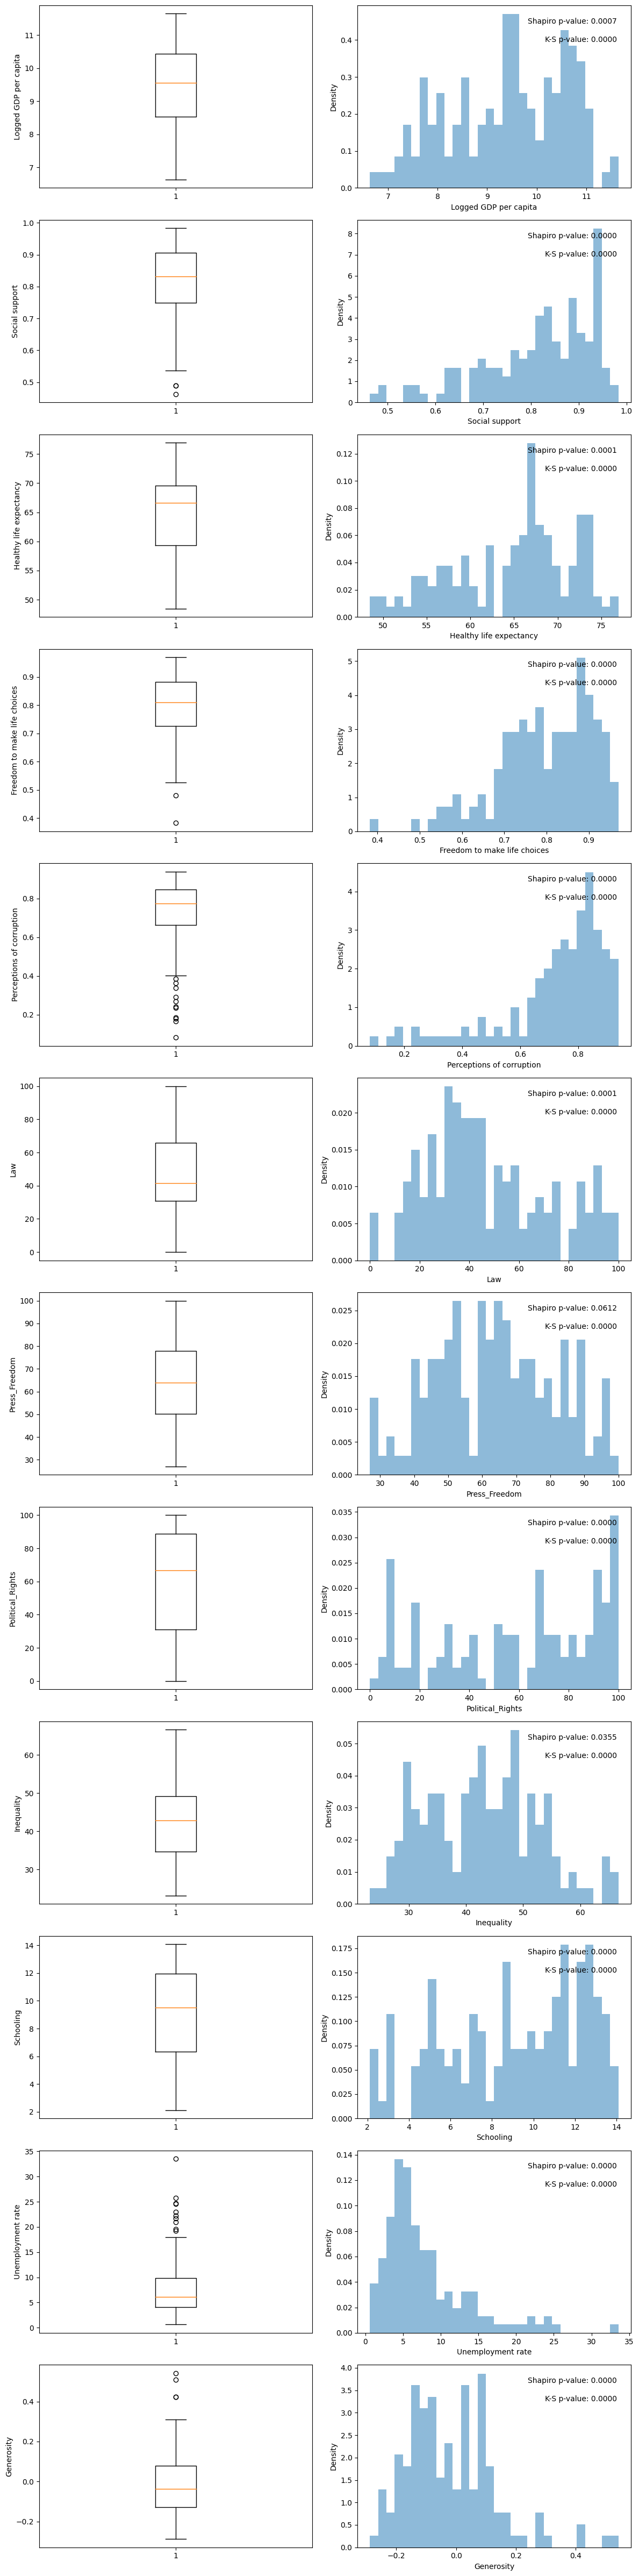

In [ ]:
#Création de visualisations


# Variables à visualiser
variables = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
             'Perceptions of corruption', 'Law', 'Press_Freedom', 'Political_Rights', 'Inequality', 'Schooling',
             'Unemployment rate', 'Generosity']

# Création de sous-plots pour chaque variable
fig, axs = plt.subplots(nrows=len(variables), ncols=2, figsize=(12, 4 * len(variables)))

# Parcours des variables et création des boxplots et courbes de distribution
for i, var in enumerate(variables):
    # Boxplot
    axs[i, 0].boxplot(df[var].dropna())
    axs[i, 0].set_ylabel(var)
    
    # Distribution plot
    axs[i, 1].hist(df[var].dropna(), bins=30, density=True, alpha=0.5)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('Density')
    
    # Test de normalité Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(df[var].dropna())
    axs[i, 1].text(0.95, 0.9, f'Shapiro p-value: {shapiro_p:.4f}', transform=axs[i, 1].transAxes, ha='right')
    
    # Test de normalité Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(df[var].dropna(), 'norm')
    axs[i, 1].text(0.95, 0.8, f'K-S p-value: {ks_p:.4f}', transform=axs[i, 1].transAxes, ha='right')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage des graphiques
plt.show()

Afin de préparer notre jeux de données à la modélisation, nous allons choisir les variables prédictives et la variable dépendante séparer les jeu de données en jeu d'entrainement et jeu de test, puis standardiser les variables

In [ ]:
#SEPARATION DU JEUX DE DONNEES


#Importer le package
from sklearn.model_selection import train_test_split

# Variables prédictives
predictors = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
              'Freedom to make life choices', 'Perceptions of corruption', 'Law',
              'Press_Freedom', 'Political_Rights', 'Inequality', 'Schooling',
              'Unemployment rate', 'armed_conflicts', 'Generosity']

# Variable dépendante
dependent = 'Ladder score'


# Séparation des données en jeu d'entraînement et jeu de test en maintenant une moyenne similaire
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[dependent], test_size=0.2, random_state=40)

# Vérification des moyennes
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)
print("Moyenne du jeu d'entraînement - y_train :", mean_train)
print("Moyenne du jeu de test - y_test :", mean_test)

# Vérification des dimensions
print("Dimensions du jeu d'entraînement - X_train :", X_train.shape)
print("Dimensions du jeu de test - X_test :", X_test.shape)
print("Dimensions du jeu d'entraînement - y_train :", y_train.shape)
print("Dimensions du jeu de test - y_test :", y_test.shape)


Moyenne du jeu d'entraînement - y_train : 5.5199017857142865
Moyenne du jeu de test - y_test : 5.639607142857144
Dimensions du jeu d'entraînement - X_train : (112, 13)
Dimensions du jeu de test - X_test : (28, 13)
Dimensions du jeu d'entraînement - y_train : (112,)
Dimensions du jeu de test - y_test : (28,)


In [ ]:
#STANDARDISATION

#Package à importer
from sklearn.preprocessing import StandardScaler

# Colonnes à inclure dans le DataFrame
columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Perceptions of corruption', 'Law',
           'Press_Freedom', 'Political_Rights', 'Inequality', 'Schooling',
           'Unemployment rate', 'armed_conflicts', 'Generosity']

# Extraction des colonnes du jeu de données
X_train = X_train[columns]
X_test = X_test[columns]

# Création d'un objet StandardScaler avec les paramètres souhaités
scaler = StandardScaler(with_mean=True, with_std=True)

# Mise à l'échelle des données d'entraînement
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)

# Mise à l'échelle des données de test
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)

**2.Regression Linéaire initiale**

In [ ]:
#REGRESSION LINEAIRE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu d'entraînement
y_train_pred = model.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = model.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 0.18119919579537477
MAE (Mean Absolute Error) : 0.32876741284384753
R^2 (Coefficient de détermination) : 0.8412930579900771

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.23139407397318315
MAE (Mean Absolute Error) : 0.3820095319067144
R^2 (Coefficient de détermination) : 0.8294689403864646




**Approche par comparaison des modèles**







 a) Identification de la Variable Indépendante ayant la p-value la plus élevée


In [ ]:
# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()


Variable : Logged GDP per capita
Coefficient : 0.48974139238281594
P-value : 0.00010938358915235646

Variable : Social support
Coefficient : 0.22041506349776485
P-value : 0.003265847548068912

Variable : Healthy life expectancy
Coefficient : 0.3301804620294475
P-value : 0.0007394113961469717

Variable : Freedom to make life choices
Coefficient : 0.1640268559496863
P-value : 0.006039218640159216

Variable : Perceptions of corruption
Coefficient : -0.1306732306081124
P-value : 0.025801095841119004

Variable : Law
Coefficient : -0.2653109321931202
P-value : 0.018229591158020808

Variable : Press_Freedom
Coefficient : 0.40327721893035895
P-value : 2.353012677325239e-05

Variable : Political_Rights
Coefficient : -0.03606290024825215
P-value : 0.6930321731516678

Variable : Inequality
Coefficient : 0.04312230081275359
P-value : 0.4615100260440612

Variable : Schooling
Coefficient : -0.20348861438119858
P-value : 0.009935904369550608

Variable : Unemployment rate
Coefficient : -0.197647714810

Political_Rights est la VI ayant la p-value la plus élevée. Il faut donc la soustraire au modèle

b)Modèle sans Political_rights

In [ ]:
# SUPPRESSION DE Political_Rights

X_train = X_train.drop(['Political_Rights'], axis = 1)
X_test = X_test.drop(['Political_Rights'], axis = 1)

In [ ]:
# 2e REGRESSION SANS Politica_Rights


# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu de données d'entraînement :
MSE (Mean Squared Error) : 0.1814890120688803
MAE (Mean Absolute Error) : 0.3294799138482422
R^2 (Coefficient de détermination) : 0.8410392166067815

Métriques sur le jeu de données de test :
MSE (Mean Squared Error) : 0.23133477477938788
MAE (Mean Absolute Error) : 0.3837593473042679
R^2 (Coefficient de détermination) : 0.8295126422591119


In [ ]:
#Identification de la VI ayant la p-value la plus élevée


# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Logged GDP per capita
Coefficient : 0.4916127951204972
P-value : 9.532888271057693e-05

Variable : Social support
Coefficient : 0.22033128681274994
P-value : 0.003144345268453863

Variable : Healthy life expectancy
Coefficient : 0.3218139354379208
P-value : 0.0007021960954765039

Variable : Freedom to make life choices
Coefficient : 0.16371618434227914
P-value : 0.005909191586309426

Variable : Perceptions of corruption
Coefficient : -0.13978247950966474
P-value : 0.00933183202697263

Variable : Law
Coefficient : -0.2774952769774128
P-value : 0.01000796533720516

Variable : Press_Freedom
Coefficient : 0.37963143292822105
P-value : 2.156513607687316e-07

Variable : Inequality
Coefficient : 0.038088287567404955
P-value : 0.5031959309436909

Variable : Schooling
Coefficient : -0.204421405744644
P-value : 0.009271569621547293

Variable : Unemployment rate
Coefficient : -0.1948609780291253
P-value : 0.0005392191842421568

Variable : armed_conflicts
Coefficient : -0.07777105254164

Inequality est la VI ayant la p-value la plus élevée. On l'a soutrait du modèle

c) Modèle sans Inequality

In [ ]:
# SUPPRESSION DE Inequality

X_train = X_train.drop(['Inequality'], axis = 1)
X_test = X_test.drop(['Inequality'], axis = 1)

In [ ]:
# 3e REGRESSION SANS Inequality

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)


Métriques sur le jeu de données d'entraînement :
MSE (Mean Squared Error) : 0.1823166833418101
MAE (Mean Absolute Error) : 0.33128585059219706
R^2 (Coefficient de détermination) : 0.8403142841580498

Métriques sur le jeu de données de test :
MSE (Mean Squared Error) : 0.2333448832278324
MAE (Mean Absolute Error) : 0.3863511388435459
R^2 (Coefficient de détermination) : 0.8280312476937045


In [ ]:
#Identification de la VI ayant la p-value la plus élevée


# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Logged GDP per capita
Coefficient : 0.47841127719688376
P-value : 0.00011163890510457186

Variable : Social support
Coefficient : 0.21873394211844593
P-value : 0.0032536389919235464

Variable : Healthy life expectancy
Coefficient : 0.3145857997988387
P-value : 0.0008136585255755779

Variable : Freedom to make life choices
Coefficient : 0.169242318105996
P-value : 0.00400276605970884

Variable : Perceptions of corruption
Coefficient : -0.13810451036837607
P-value : 0.009891282411379265

Variable : Law
Coefficient : -0.2635791325222382
P-value : 0.012264649840300956

Variable : Press_Freedom
Coefficient : 0.3640612676282369
P-value : 1.2153509532097928e-07

Variable : Schooling
Coefficient : -0.2105350200738328
P-value : 0.00687430701791758

Variable : Unemployment rate
Coefficient : -0.1840245080629069
P-value : 0.0005955465097695622

Variable : armed_conflicts
Coefficient : -0.07776949523175485
P-value : 0.12353105225731653

Variable : Generosity
Coefficient : 0.032216800612

Generosity est la VI ayant la p-value la plus élevée. On l'a soutrait du modèle

d) Modèle sans Generosity

In [ ]:
# SUPPRESSION DE Generosity

X_train = X_train.drop(['Generosity'], axis = 1)
X_test = X_test.drop(['Generosity'], axis = 1)

In [ ]:
# 4e REGRESSION SANS Generosity

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)


In [ ]:
#Identification de la VI ayant la p-value la plus élevée

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Logged GDP per capita
Coefficient : 0.4691406704986081
P-value : 0.0001278229161840727

Variable : Social support
Coefficient : 0.22221222536928437
P-value : 0.0026654802873999905

Variable : Healthy life expectancy
Coefficient : 0.30883787602765933
P-value : 0.0009184834122002439

Variable : Freedom to make life choices
Coefficient : 0.17547395174481978
P-value : 0.0024633924149828346

Variable : Perceptions of corruption
Coefficient : -0.14426386313278733
P-value : 0.006127843813865441

Variable : Law
Coefficient : -0.26437903569294186
P-value : 0.011759380465521163

Variable : Press_Freedom
Coefficient : 0.3645594970175844
P-value : 1.0704072450629099e-07

Variable : Schooling
Coefficient : -0.20995447696662123
P-value : 0.006856494376996203

Variable : Unemployment rate
Coefficient : -0.19207316774365207
P-value : 0.00023070238163502843

Variable : armed_conflicts
Coefficient : -0.07537237974012624
P-value : 0.1332510680269594



armed_conflicts est la VI ayant la p-value la plus élevée. Il faut donc la soustraire au modèle

d) Modèle sans armed_conflicts

In [ ]:
# SUPPRESSION DE ARMED CONFLICTS

X_train = X_train.drop(['armed_conflicts'], axis = 1)
X_test = X_test.drop(['armed_conflicts'], axis = 1)

In [ ]:
# 5e REGRESSION SANS armed_conflicts

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)


Métriques sur le jeu de données d'entraînement :
MSE (Mean Squared Error) : 0.18725914805070465
MAE (Mean Absolute Error) : 0.33569442869486477
R^2 (Coefficient de détermination) : 0.8359853275283171

Métriques sur le jeu de données de test :
MSE (Mean Squared Error) : 0.20093223750843622
MAE (Mean Absolute Error) : 0.35635745814516967
R^2 (Coefficient de détermination) : 0.8519184749009463


In [ ]:
#Identification de la VI ayant la p-value la plus élevée

from sklearn.linear_model import LinearRegression
import numpy as np

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Logged GDP per capita
Coefficient : 0.45703317289294704
P-value : 0.00019467397055872304

Variable : Social support
Coefficient : 0.21160954293664425
P-value : 0.004199844844031686

Variable : Healthy life expectancy
Coefficient : 0.3168631516236426
P-value : 0.0007191687451399975

Variable : Freedom to make life choices
Coefficient : 0.1948169444100312
P-value : 0.0006514871092897501

Variable : Perceptions of corruption
Coefficient : -0.1440051234790673
P-value : 0.006525288107981364

Variable : Law
Coefficient : -0.26275421946236854
P-value : 0.012788312446705419

Variable : Press_Freedom
Coefficient : 0.3824984257759498
P-value : 2.1606343381108672e-08

Variable : Schooling
Coefficient : -0.18416223137371943
P-value : 0.015214106511903802

Variable : Unemployment rate
Coefficient : -0.1759949502147209
P-value : 0.0005677385940361379



**Plus aucune variable ne présente une p-value >.05**

Equation de régression finale : 

Bonheur = 0.46×PIB + 0.21×Social + 0.32×Santé + 0.19×Liberté - 0.26×Law + 0.38×Press - 0.18×Schooling - 0.18×Unemployment.


Dans un premier temps nous avons réalisé une régression avec toutes les variables à disposition (qui nous paraissaient pertinentes),
puis nous avons enlevé une à une les variables ayant la p-value la plus grande, tant que la p-value était supérieure à .05. 
Grâce à cet approche, nous avons été en mesure de proposer un modèle relativement parcimonieux et
présentant une bonne valeur explicative puisqu'il explique plus de 85% de la variance du bonheur d'un pays. Il n'est pas 
surentrainé car le carré moyen de l'erreur ne varie pas beaucoup entre la phase d'entrainement (0.187) et la phase de
test (0.201).

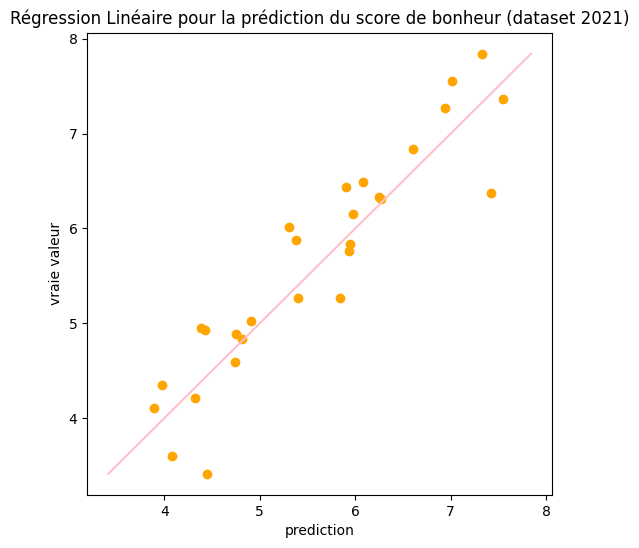

In [ ]:
#Création d'un graphique pour la prédiction du modèle

pred_test = model.predict(X_test)

plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'pink')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Régression Linéaire pour la prédiction du score de bonheur (dataset 2021)')
plt.show()

In [ ]:
display(y_train.describe(), y_test.describe())


count    112.000000
mean       5.519902
std        1.073316
min        2.523000
25%        4.846500
50%        5.505500
75%        6.182250
max        7.620000
Name: Ladder score, dtype: float64

count    28.000000
mean      5.639607
std       1.186237
min       3.415000
25%       4.873750
50%       5.803000
75%       6.391500
max       7.842000
Name: Ladder score, dtype: float64

**3. Régression Ridge**

a) Préparation des données

In [ ]:
#Constitution du df
df = df[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Law','Press_Freedom','Political_Rights','Inequality','Schooling','Unemployment rate','armed_conflicts', 'Generosity']]


In [ ]:
#Standardisation des variables
from sklearn import preprocessing
df[df.columns] = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df))

In [ ]:
#Séparation du jeux de données
data = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Perceptions of corruption', 'Law','Press_Freedom', 'Political_Rights', 'Inequality', 'Schooling','Unemployment rate', 'armed_conflicts', 'Generosity']]
target = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=789)

print("Dimensions du jeu d'entraînement - X_train :", X_train.shape)
print("Dimensions du jeu de test - X_test :", X_test.shape)
print("Dimensions du jeu d'entraînement - y_train :", y_train.shape)
print("Dimensions du jeu de test - y_test :", y_test.shape)

Dimensions du jeu d'entraînement - X_train : (112, 13)
Dimensions du jeu de test - X_test : (28, 13)
Dimensions du jeu d'entraînement - y_train : (112,)
Dimensions du jeu de test - y_test : (28,)


In [ ]:
#Observation du df
display(y_test.describe(), y_train.describe())


count    28.000000
mean     -0.043322
std       0.955814
min      -1.864900
25%      -0.584288
50%      -0.139826
75%       0.618307
max       1.582494
Name: Ladder score, dtype: float64

count    112.000000
mean       0.010830
std        1.019042
min       -2.772640
25%       -0.663452
50%        0.050625
75%        0.665117
max        2.109333
Name: Ladder score, dtype: float64

b) Application de la régression Ridge

In [ ]:
#Importer les package
from sklearn.linear_model import RidgeCV

#Regression ridge
ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train) 

RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur le jeu d'entraînement
y_train_pred = ridge_reg.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = ridge_reg.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 0.15619765618683212
MAE (Mean Absolute Error) : 0.30295173204602516
R^2 (Coefficient de détermination) : 0.8482302651797504

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.1870771776297528
MAE (Mean Absolute Error) : 0.36310379499170586
R^2 (Coefficient de détermination) : 0.7876422672542809


In [ ]:
best_alpha = ridge_reg.alpha_

# Obtention des coefficients du modèle avec le meilleur alpha
coefficients = ridge_reg.coef_

# Affichage du meilleur alpha et des coefficients
print("Meilleur alpha :", best_alpha)
print("Coefficients :")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Variable : {feature}")
    print(f"Coefficient : {coef}")
    print()

Meilleur alpha : 1.0
Coefficients :
Variable : Logged GDP per capita
Coefficient : 0.43132619057576216

Variable : Social support
Coefficient : 0.3187661941241591

Variable : Healthy life expectancy
Coefficient : 0.21877888533146383

Variable : Freedom to make life choices
Coefficient : 0.15395587122735388

Variable : Perceptions of corruption
Coefficient : -0.08089508747834762

Variable : Law
Coefficient : -0.20548737393106675

Variable : Press_Freedom
Coefficient : 0.2737966608396438

Variable : Political_Rights
Coefficient : 0.017342308383301308

Variable : Inequality
Coefficient : -0.002243405003932608

Variable : Schooling
Coefficient : -0.160705814470412

Variable : Unemployment rate
Coefficient : -0.1425364854893295

Variable : armed_conflicts
Coefficient : -0.038980696907053636

Variable : Generosity
Coefficient : 0.047019787067913654



Equation du modèle:

Bonheur = 0.43×PIB + 0.32×Social + 0.22×Santé + 0.15×Liberté - 0.08×Corruption - 0.21×Droit 
+0.27×Presse +0.02×DroitsPolitiques - 0.00×Inequality -0.16×Scolarité -0.14×Chômage
-0.04×ConflitsArmés +0.05×Générosité

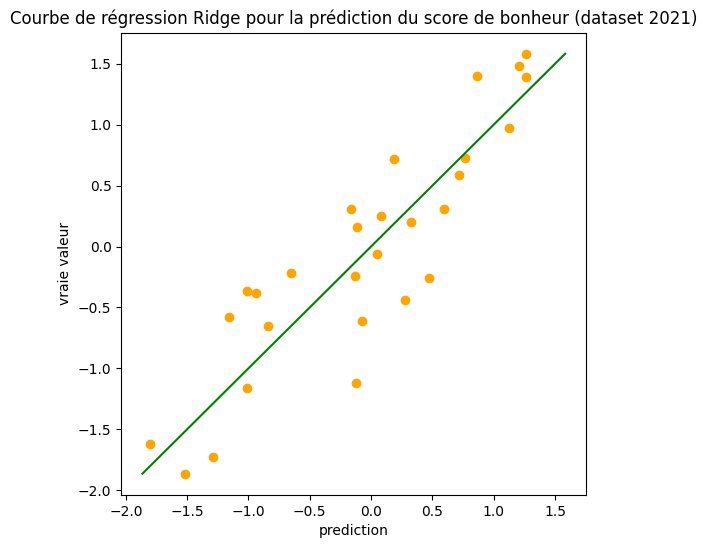

In [ ]:
#Création d'un graphique pour la prédiction du modèle

pred_test = ridge_reg.predict(X_test)

plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'green')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Ridge pour la prédiction du score de bonheur (dataset 2021)')
plt.show()

**4. Regression Lasso**

In [ ]:
#Application de la regression Lasso
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [ ]:
# Prédictions sur le jeu d'entraînement
y_train_pred = lasso_reg.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = lasso_reg.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 1.0291752592954502
MAE (Mean Absolute Error) : 0.8357721258348297
R^2 (Coefficient de détermination) : 0.0

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.8838854583563233
MAE (Mean Absolute Error) : 0.7642066307776887
R^2 (Coefficient de détermination) : -0.0033287561935495535


In [ ]:
from sklearn.linear_model import lasso_path

# Liste des valeurs d'alpha à tester
mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

# Calcul des coefficients Lasso pour différentes valeurs d'alpha
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

# Dimensions de la matrice des coefficients Lasso
coefs_lasso.shape



(13, 10)

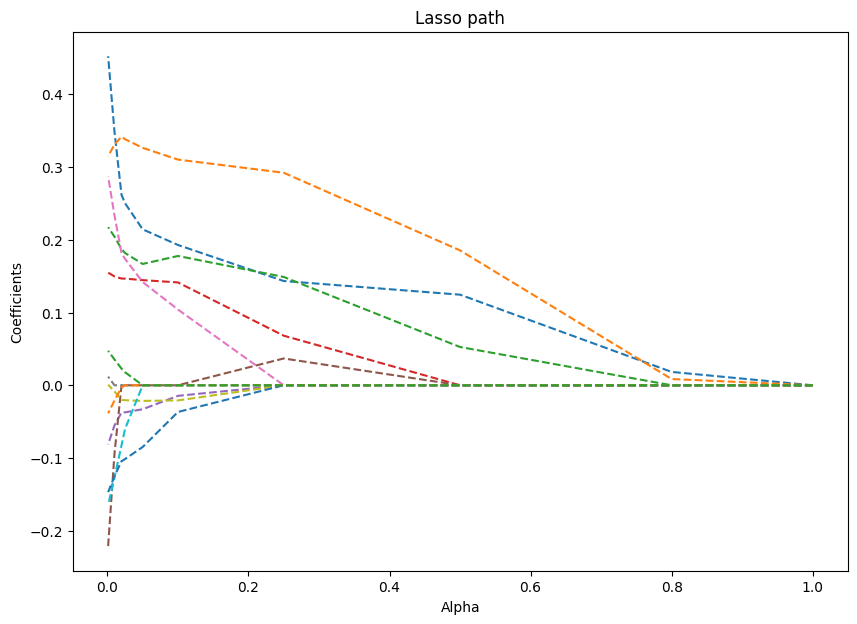

In [ ]:
#Visualisation des valeurs des coefficients Lasso en fonction des différentes valeurs d'alpha


plt.figure(figsize=(10, 7))

# Parcours des lignes de la matrice des coefficients Lasso
for i in range(coefs_lasso.shape[0]):
    # Tracé des coefficients Lasso en fonction des valeurs d'alpha
    plt.plot(alpha_path, coefs_lasso[i, :], '--')


plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()



*   Régression Lasso avec sélection automatique de l'alpha par validation croisée.




In [ ]:
# Importation de la classe LassoCV pour effectuer une régression Lasso avec validation croisée =  sélectionner automatiquement le meilleur alpha

from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10).fit(X_train, y_train)

# Récupération des valeurs d'alpha sélectionnées par LassoCV
alphas = model_lasso.alphas_




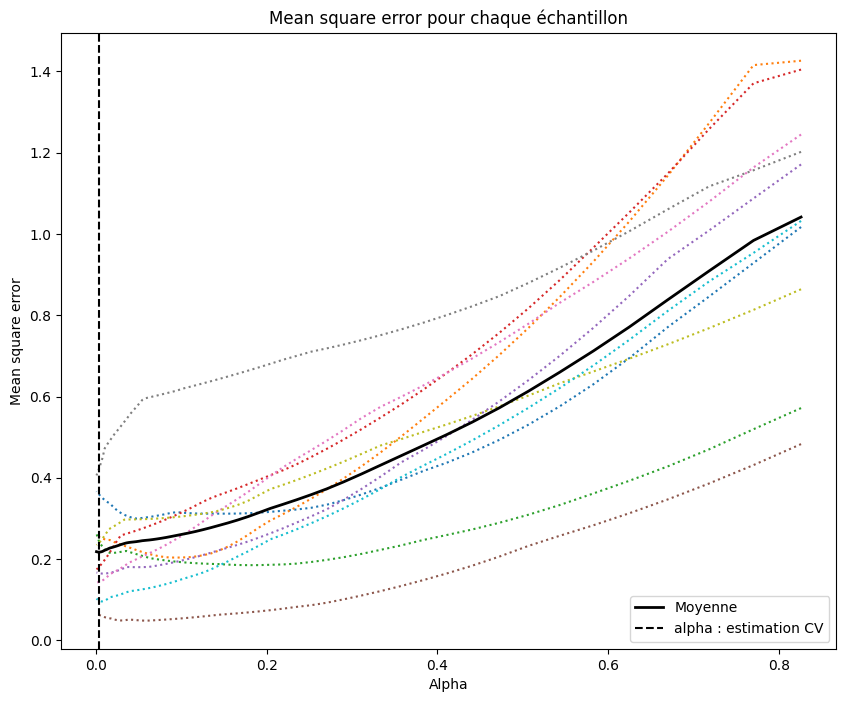

In [ ]:
#Graphique des courbes d'erreur quadratique moyenne (mean square error, MSE) en fonction des différentes valeurs d'alpha
plt.figure(figsize=(10, 8))

# Tracé des courbes des erreurs quadratiques moyennes pour chaque échantillon
plt.plot(alphas, model_lasso.mse_path_, ':')
# Tracé de la courbe de l'erreur quadratique moyenne moyenne
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)
# Tracé d'une ligne verticale pour l'estimation de l'alpha sélectionné par la validation croisée
plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')


plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();



*   Evaluation des performances du modèle Lasso 




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur le jeu d'entraînement
y_train_pred = model_lasso.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = model_lasso.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 0.1565614016898786
MAE (Mean Absolute Error) : 0.3037389672150527
R^2 (Coefficient de détermination) : 0.8478768312045736

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.18627690494010957
MAE (Mean Absolute Error) : 0.3630074756055885
R^2 (Coefficient de détermination) : 0.7885506842835739


In [ ]:
# Création d'un objet modèle Lasso avec un paramètre d'alpha (régularisation)
alpha = 0  # Valeur d'alpha à ajuster selon vos besoins
lasso_model = Lasso(alpha=alpha)

# Entraînement du modèle sur les données d'entraînement
lasso_model.fit(X_train, y_train)

# Obtention des coefficients du modèle
coefficients = lasso_model.coef_

# Affichage des coefficients
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Variable : {feature}")
    print(f"Coefficient : {coef}")
    print()


Variable : Logged GDP per capita
Coefficient : 0.466228473619665

Variable : Social support
Coefficient : 0.3128493016902064

Variable : Healthy life expectancy
Coefficient : 0.2197544553836896

Variable : Freedom to make life choices
Coefficient : 0.1544991473825006

Variable : Perceptions of corruption
Coefficient : -0.0851392548487714

Variable : Law
Coefficient : -0.23717550940397114

Variable : Press_Freedom
Coefficient : 0.29409015601060223

Variable : Political_Rights
Coefficient : 0.01422858448643729

Variable : Inequality
Coefficient : 0.006122110711488383

Variable : Schooling
Coefficient : -0.16904274455136103

Variable : Unemployment rate
Coefficient : -0.15092965210777226

Variable : armed_conflicts
Coefficient : -0.04078504508508467

Variable : Generosity
Coefficient : 0.04910034542584458



<ipython-input-101-7efcc5f9a6ae>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.733e+00, tolerance: 1.153e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Équation du modèle :

Bonheur = 0.47×PIB + 0.31×Support social + 0.22×Espérance de vie en bonne santé + 0.15×Liberté de choix +
-0.09×Perceptions de la corruption - 0.24×Loi + 0.29×Liberté de la presse + 0.01×Droits politiques +
0.01×Inégalité - 0.17×Scolarité - 0.15×Taux de chômage - 0.04×Conflits armés + 0.05×Générosité

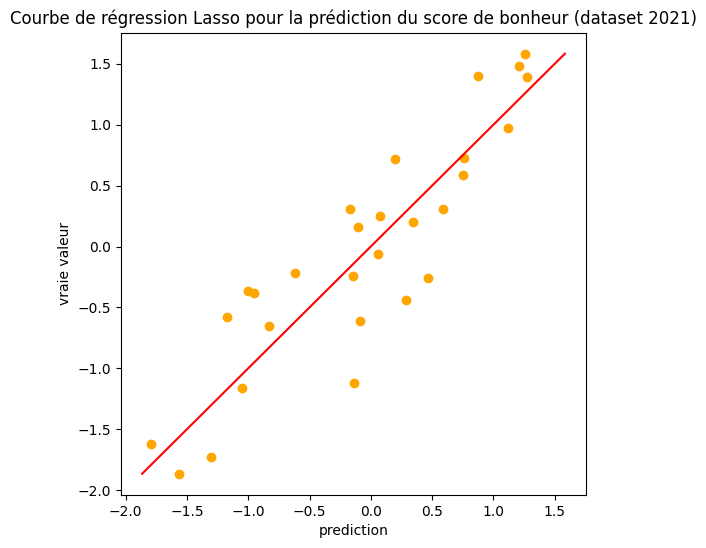

In [ ]:
# Prédiction du modèle Lasso sur le jeu de test
pred_test = lasso_model.predict(X_test)


# Affichage d'un nuage de points avec les prédictions du modèle Lasso (axe x) et les vraies valeurs (axe y) du jeu de test
plt.figure(figsize=(6, 6))
plt.scatter(pred_test, y_test, c='orange')

# Affichage d'une ligne diagonale représentant l'identité (x = y) pour visualiser l'ajustement du modèle
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c='red')


plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Lasso pour la prédiction du score de bonheur (dataset 2021)')
plt.show()


**5. Régression Elastic Net**


In [ ]:
#Importer les fonctions
from sklearn.linear_model import ElasticNetCV

# Création d'un objet modèle Elastic Net avec une validation croisée à 8 plis et une liste de rapports L1/L2 spécifiés
model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))


# Entraînement du modèle Elastic Net sur les données d'entraînement
model_en.fit(X_train, y_train)
#model= LassoCV(cv=10).fit(X_train, y_train)

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [ ]:
#Créer un Df des coefficients du modèle Elastic Net + l'intercept 
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,-0.003173
Logged GDP per capita,0.420728
Social support,0.319837
Healthy life expectancy,0.217963
Freedom to make life choices,0.153546
Perceptions of corruption,-0.077608
Law,-0.191576
Press_Freedom,0.269812
Political_Rights,0.013726
Inequality,-0.003178


Equation de régression:

Bonheur = 0.420728 × PIB + 0.319837 × Social + 0.217963 × Espérance de vie en bonne santé + 0.153546 × Liberté de faire des choix de vie + 0.077608 × Perception de la corruption - 0.191576 × Loi + 0.269812 × Liberté de la presse + 0.013726 × Droits politiques - 0.003178 × Inégalité - 0.156633 × Scolarité - 0.140324 × Taux de chômage - 0.036933 × Conflits armés + 0.045715 × Générosité

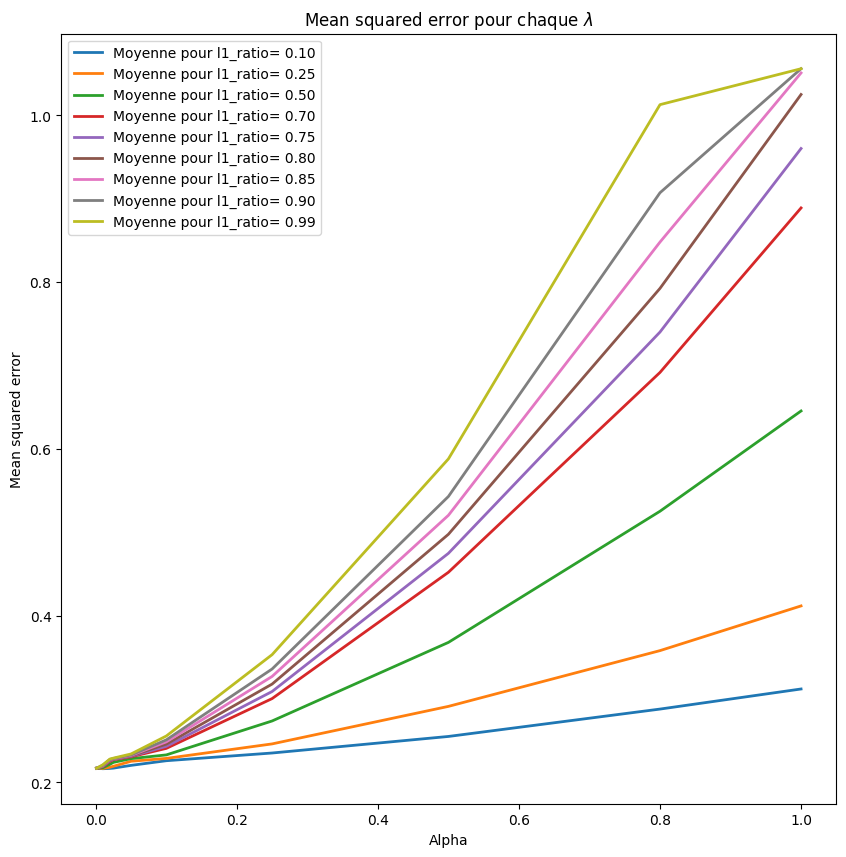

In [ ]:
#tracer les courbes d'erreur quadratique moyenne en fonction des valeurs d'alpha pour chaque rapport L1/L2 utilisé lors de l'entraînement du modèle Elastic Net
alphas = model_en.alphas_

plt.figure(figsize=(10, 10))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

In [ ]:
# Prédictions sur les jeux d'entraînement et de test en utilisant le modèle Elastic Net entraîné

pred_train = model_en.predict(X_train)
pred_test = model_en.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))


print("RMSE sur le jeu d'entraînement :", train_rmse)
print("RMSE sur le jeu de test :", test_rmse)



RMSE sur le jeu d'entraînement : 0.3954930955674146
RMSE sur le jeu de test : 0.4334633441149268


In [ ]:
#Evaluation du modèle
print('score train :', model_en.score(X_train, y_train))
print('score test :', model_en.score(X_test, y_test))

score train : 0.8480192880379052
score test : 0.7867190703534337


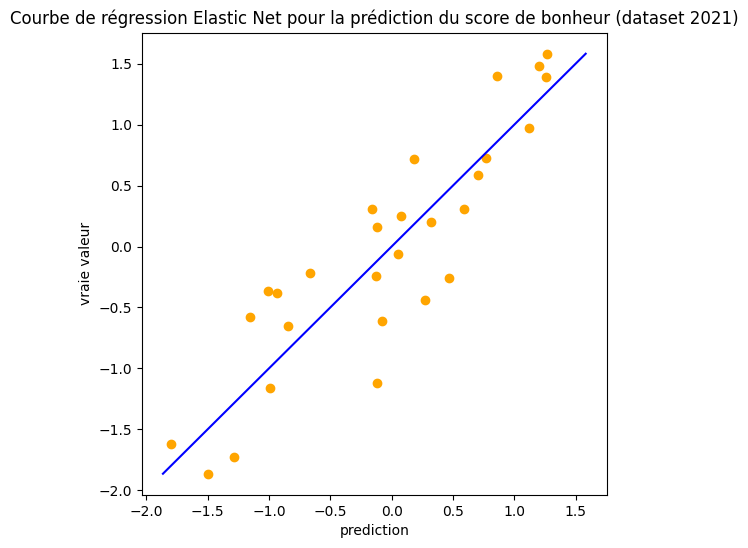

In [ ]:
# Prédiction du modèle Elastic net sur le jeu de test
pred_test = model_en.predict(X_test)

plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'blue')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Elastic Net pour la prédiction du score de bonheur (dataset 2021)')
plt.show()

### **II.Modèles de classification**

In [ ]:
#Import des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Importer à nouveau le df
df = pd.read_csv('df2021_final.csv')
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Law,Press_Freedom,Political_Rights,Inequality,Schooling,armed_conflicts,Unemployment rate
0,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.000000,41.305990,7.142857,41.010,2.985070,1.0,13.28
1,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,41.109953,60.885051,71.428571,34.900,11.286455,0.0,11.82
2,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,26.859616,49.141932,28.571429,38.080,8.069284,1.0,12.70
3,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,35.862120,83.410685,88.095238,45.085,11.147269,0.0,10.90
4,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,45.186924,74.441446,59.523810,29.900,11.330300,0.0,20.90


**1. Préparation des données**

In [ ]:
# Création de la colonne catégorielle correspondant au Ladder score divisé en 3 classes (tercile)
print(df['Ladder score'].quantile([0.33, 0.66, 1]))
df['hapiness_categ'] = pd.qcut(df['Ladder score'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

df['hapiness_categ'].value_counts()

0.33    5.04305
0.66    6.04458
1.00    7.84200
Name: Ladder score, dtype: float64


High      48
Low       46
Medium    46
Name: hapiness_categ, dtype: int64

In [ ]:
#Suppression des colonnes inutiles
df = df.drop(['Country name', 'Regional indicator', 'Ladder score'], axis=1)

In [ ]:
#Separer variable cible des variables explicatives
X = df.drop('hapiness_categ', axis = 1)
y = df['hapiness_categ']

In [ ]:
#Observation des données
display(X.head())
display(X.info())
display(y.head())

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Law,Press_Freedom,Political_Rights,Inequality,Schooling,armed_conflicts,Unemployment rate
0,7.695,0.463,52.493,0.382,-0.102,0.924,0.000000,41.305990,7.142857,41.010,2.985070,1.0,13.28
1,9.520,0.697,68.999,0.785,-0.030,0.901,41.109953,60.885051,71.428571,34.900,11.286455,0.0,11.82
2,9.342,0.802,66.005,0.480,-0.067,0.752,26.859616,49.141932,28.571429,38.080,8.069284,1.0,12.70
3,9.962,0.898,69.000,0.828,-0.182,0.834,35.862120,83.410685,88.095238,45.085,11.147269,0.0,10.90
4,9.487,0.799,67.055,0.825,-0.168,0.629,45.186924,74.441446,59.523810,29.900,11.330300,0.0,20.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Logged GDP per capita         140 non-null    float64
 1   Social support                140 non-null    float64
 2   Healthy life expectancy       140 non-null    float64
 3   Freedom to make life choices  140 non-null    float64
 4   Generosity                    140 non-null    float64
 5   Perceptions of corruption     140 non-null    float64
 6   Law                           140 non-null    float64
 7   Press_Freedom                 140 non-null    float64
 8   Political_Rights              140 non-null    float64
 9   Inequality                    140 non-null    float64
 10  Schooling                     140 non-null    float64
 11  armed_conflicts               140 non-null    float64
 12  Unemployment rate             140 non-null    float64
dtypes: fl

None

0       Low
1    Medium
2       Low
3    Medium
4    Medium
Name: hapiness_categ, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
# Divisez les données en ensembles d'entraînement et de test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
#Standardiser les valeurs
sc = StandardScaler()
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])

In [ ]:
# Encodage de la variable cible
# 0 = High
# 2 = Medium
# 1 = Low
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

**2.Regression logistic**

In [ ]:
#Entrainer le modèle
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

#overfitting

Score sur ensemble train 0.8660714285714286
Score sur ensemble test 0.6071428571428571


In [ ]:
#Predire les classes
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)


In [ ]:
#Evaluation et matrice de confusion

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred, ))

Prédiction,0,1,2
Realité,,,
0,4,0,4
1,0,8,1
2,2,4,5


              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.67      0.89      0.76         9
           2       0.50      0.45      0.48        11

    accuracy                           0.61        28
   macro avg       0.61      0.61      0.60        28
weighted avg       0.60      0.61      0.60        28



**3.Arbre de décision**

In [ ]:
#Entrainer le model


from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

print('Score sur ensemble train', clf.score(X_train, y_train))
print('Score sur ensemble test', clf.score(X_test, y_test))

#Overfitting

Score sur ensemble train 1.0
Score sur ensemble test 0.5357142857142857


In [ ]:
#Evaluation du model

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))


print(classification_report(y_test, y_pred ))

Prédiction,0,1,2
Realité,,,
0,4,0,4
1,1,4,4
2,3,1,7


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.80      0.44      0.57         9
           2       0.47      0.64      0.54        11

    accuracy                           0.54        28
   macro avg       0.59      0.53      0.54        28
weighted avg       0.58      0.54      0.54        28



<Axes: >

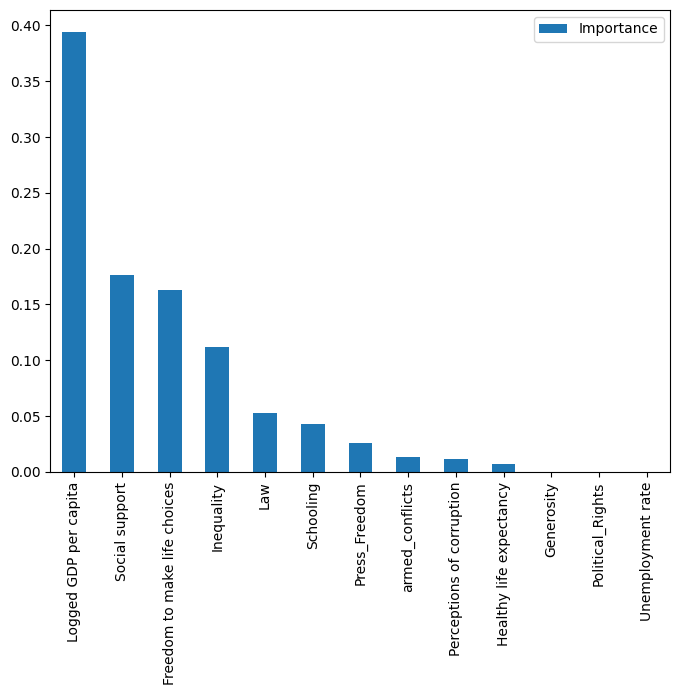

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Création d'un DataFrame pour stocker les importances des features
feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Importance"])

# Tri des features par ordre décroissant d'importance
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Tracé d'un diagramme en barres pour visualiser les importances des features
feat_importances.plot(kind='bar', figsize=(8, 6))


In [ ]:
#Entraînement du modèle en ne gardant que les trois variables les plus importantes : Law , social support, press_freedom

X_train_new = X_train[['Law','Social support','Press_Freedom']]
X_test_new = X_test[['Law','Social support','Press_Freedom']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))

#Overfitting

1.0
0.5357142857142857


In [ ]:
# classification report et matrice de confusion du nouveau jeu de données
y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1,2
Realité,,,
0,4,0,4
1,0,6,3
2,3,3,5


              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.67      0.67      0.67         9
           2       0.42      0.45      0.43        11

    accuracy                           0.54        28
   macro avg       0.55      0.54      0.54        28
weighted avg       0.54      0.54      0.54        28



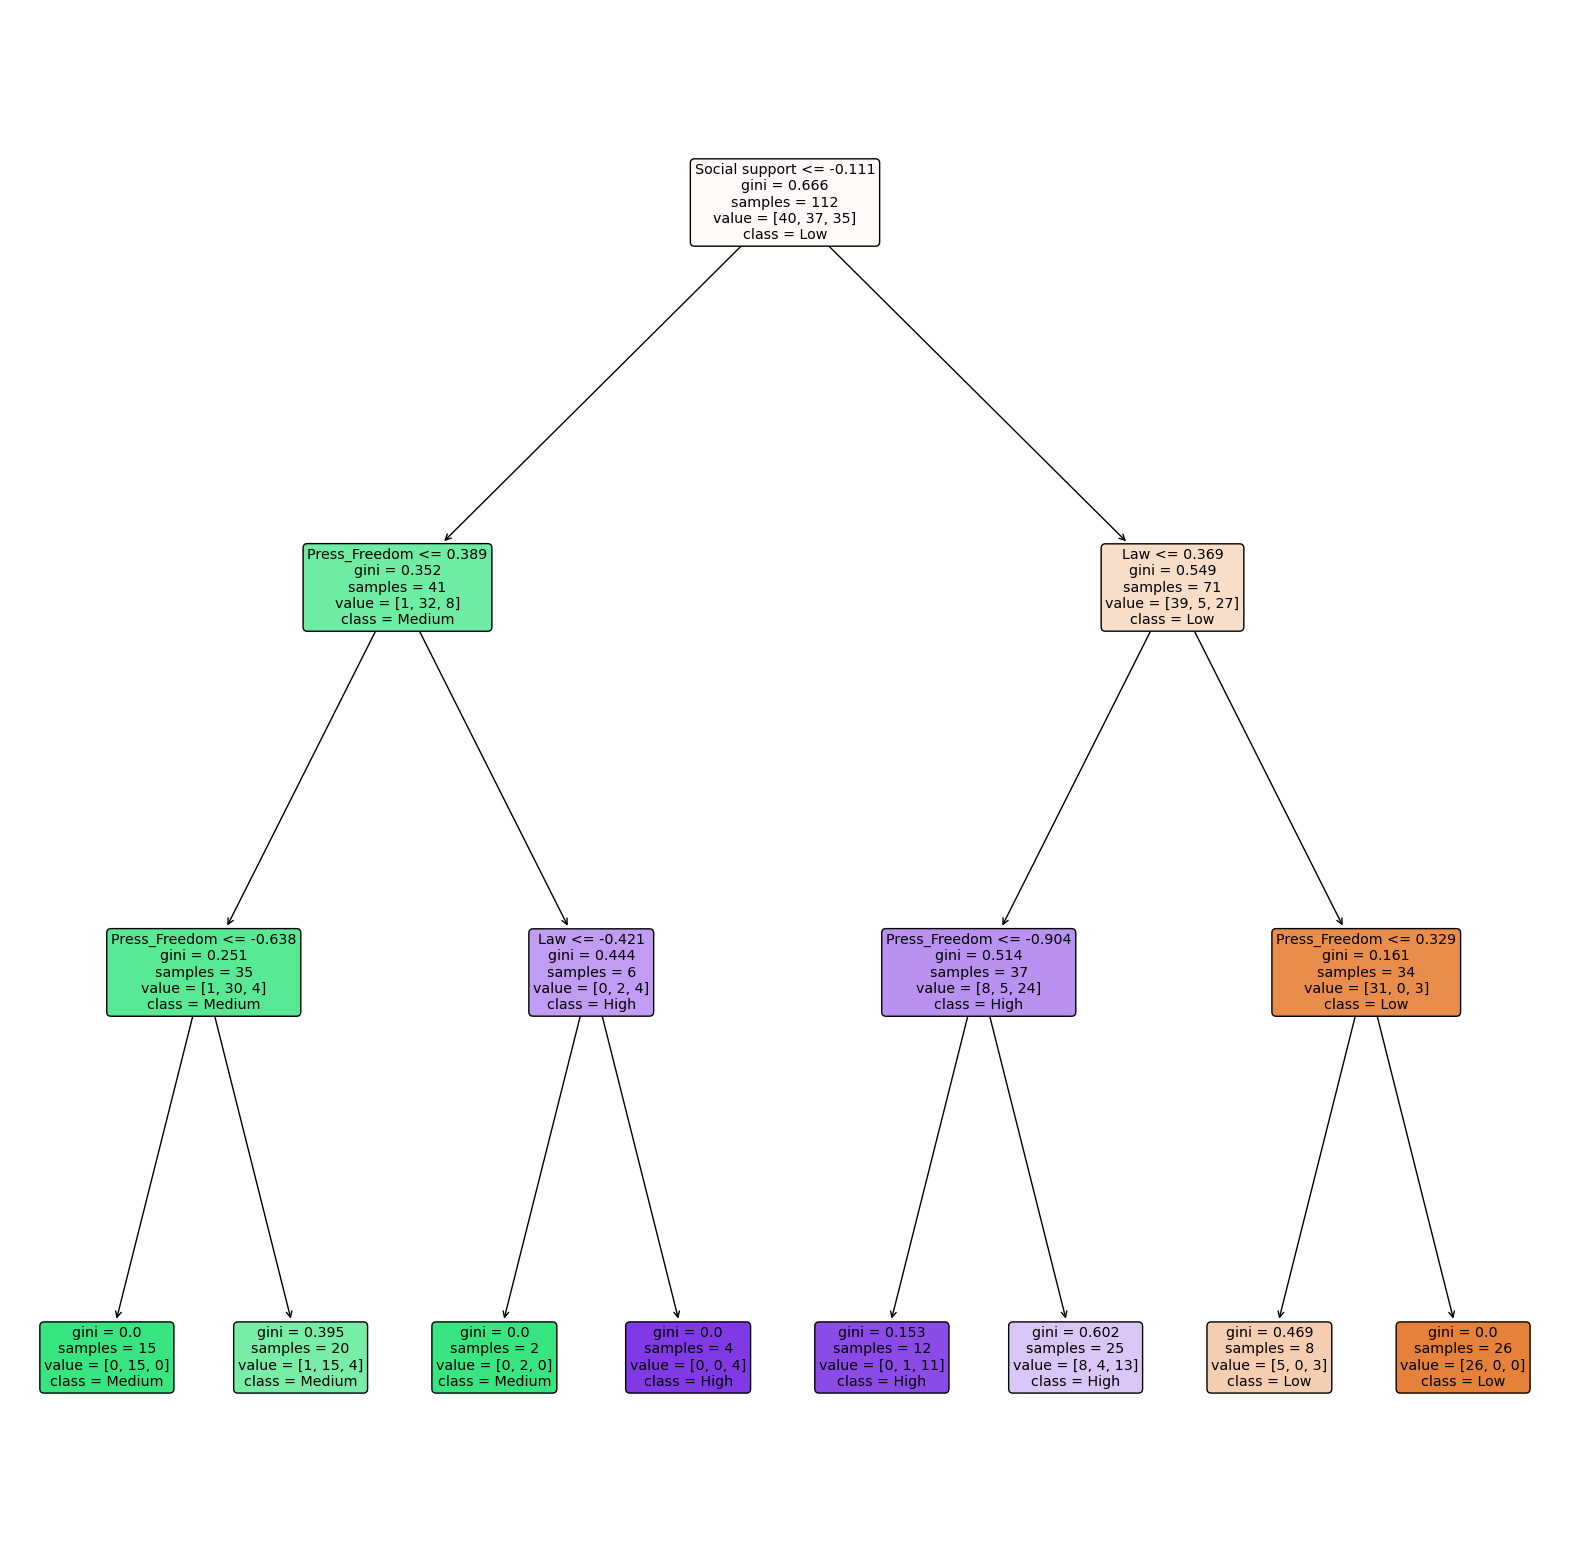

In [ ]:
#Création d'un arbre de décision

from sklearn.tree import plot_tree 

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 

clf.fit(X_train_new, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['Law','Social support','Press_Freedom'],
          class_names = ['Low','Medium','High'],
          filled = True, 
          rounded = True)

plt.show()

**4.Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score sur ensemble train', rf.score(X_train, y_train))
print('Score sur ensemble test', rf.score(X_test, y_test))

#Overfitting

Score sur ensemble train 1.0
Score sur ensemble test 0.6785714285714286


In [ ]:
# classification report et matrice de confusion

y_pred = rf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1,2
Realité,,,
0,7,0,1
1,0,7,2
2,3,3,5


              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.70      0.78      0.74         9
           2       0.62      0.45      0.53        11

    accuracy                           0.68        28
   macro avg       0.67      0.70      0.68        28
weighted avg       0.67      0.68      0.67        28



Meilleur accuracy, modèle plus performant

In [ ]:
# affichage de la distribution de la variable cible en %
y.value_counts(normalize=True)

High      0.342857
Low       0.328571
Medium    0.328571
Name: hapiness_categ, dtype: float64

In [ ]:
# rééchantillonage afin de palier au déséquilibre de la distibution de la variable cible  et afficher la nouvelle distrib
from imblearn.over_sampling import RandomOverSampler
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts(normalize = True)))

Classes échantillon oversampled : {0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}


In [ ]:
# réentrainement du modèle le plus performant : 

rf = RandomForestClassifier()
rf.fit(X_ro, y_ro)


print('Score sur ensemble train', rf.score(X_ro, y_ro))
print('Score sur ensemble test', rf.score(X_test, y_test))


#Scores identitiques

Score sur ensemble train 1.0
Score sur ensemble test 0.6428571428571429


In [ ]:
# matrice de confusion et classification report 
y_pred = rf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1,2
Realité,,,
0,5,0,3
1,0,7,2
2,2,3,6


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.70      0.78      0.74         9
           2       0.55      0.55      0.55        11

    accuracy                           0.64        28
   macro avg       0.65      0.65      0.65        28
weighted avg       0.64      0.64      0.64        28



Rééchantillonage pas utile, les resultats restent les mêmes